# Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()


# Retrieving the images and their labels 


In [3]:
for i in range(classes):
    path = os.path.join(r'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '//' + a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays


In [4]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Splitting training and testing dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Converting the labels into one hot encoding

In [6]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building the model

In [7]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 5
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

2022-04-20 15:23:29.538482: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
981/981 [==============================] - 178s 178ms/step - loss: 1.6808 - accuracy: 0.6022 - val_loss: 0.1965 - val_accuracy: 0.9467
Epoch 2/5
981/981 [==============================] - 174s 177ms/step - loss: 0.3821 - accuracy: 0.8932 - val_loss: 0.1172 - val_accuracy: 0.9748
Epoch 3/5
981/981 [==============================] - 169s 172ms/step - loss: 0.2846 - accuracy: 0.9226 - val_loss: 0.0853 - val_accuracy: 0.9791
Epoch 4/5
981/981 [==============================] - 162s 165ms/step - loss: 0.2147 - accuracy: 0.9422 - val_loss: 0.0661 - val_accuracy: 0.9842
Epoch 5/5
981/981 [==============================] - 171s 174ms/step - loss: 0.2253 - accuracy: 0.9423 - val_loss: 0.0742 - val_accuracy: 0.9807


# plotting graphs for accuracy 


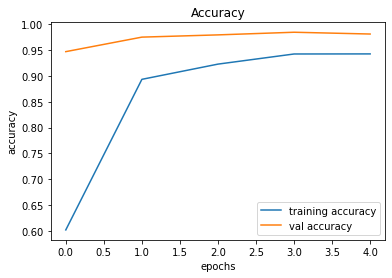

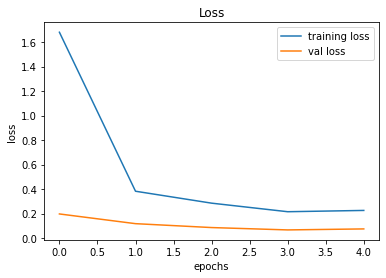

In [8]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
model.save("my_model.h5")

# testing accuracy on test dataset

In [9]:
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs :
    #image = Image.open(r'Test\00000.png')
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
#pred = model.predict_classes(X_test)
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

# Accuracy with the test data

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x))
model.save('traffic_classifier1.h5')

0.9457640538400633
